# Python Lab 1: Read, Write, Vizualize!

## Agenda

1. Why Python?
2. Objectives
3. Setting up your development environment
4. Reading and writing tabular data with the Numpy library
5. Encapsulating data with the Pandas library
6. Plotting with the Matplotlib library
7. Importing and inspecting NetCDF files

## Why Python?

Pros
* General-purpose, cross-platform
* Free and open source
* Resaonably easy to learn, good statistical/visualization libraries
* Forces good syntax
* Reads satellite data formats like HDF, NetCDF, GRIB

Cons
* Performance penalties for interpretted languages (although cython and f2py libriries can be used)
* Libraries are a "black box" and can be discontinued

Other options:
* R: Specialized for statistics but prevalent in earth sciences. Python has borrowed some of the best R features (e.g. data frames).
* Fortran/C++: Most common in algorithm development, lots of legacy code. Speed +100, coding productivity -100 
* Matlab: License expensive (Octave is a reasonable alternative)
* IDL: Licenses expensive, there are better options out there

## Objective: working with satellite datasets

* You won't learn how to code in Python
* You will learn to:
	* Read/write satellite datasets
	* Plot datasets
	* Perform re-gridding, merging, averaging, filtering

## Development environments: How do I Python?
* Spyder: most Matlab-like
* Text editor + command line
* Jupyter notebooks: web based, can launch in browser

## Launching Jupyter Notebook
You need *Anaconda Python* installed! You can also [install with pip](http://jupyter.org/install.html), but you're on your own.

### Mac/Linix:
* Open terminal, and type:
```
cd to/the/directory/
jupyter notebook    
```

### Windows:
* Open Anaconda Prompt
```
cd to\the\directory\
jupyter notebook    
```
... or double click the icon:
![](img/jupyter.png)


### NOAA/STAR Laptops
* Anaconda is on the whitelist, but if you want to install or update specific packages from IT (admin priviledges required)
* Install your own local copy on your server for full usage, including jupyter notebooks.

### NOAA/NCEP Laptops
* ??

## Launching Jupyter Notebook

This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in. 

Click on New on the top right:
![](img/ipython-notebook.PNG)

You can edit and run code directly in this notebook (similar to Mathematica).

In [ ]:
# This is a comment
print("hello world")

In [ ]:
# This is an array
test=[1, 2, 3, 4]

In [ ]:
# This will show me the array
print(test)

In [ ]:
# So will this
test

In [ ]:
# This is a function (note the TAB!)
def Farenheit2Celsius(F):
    return (F-32)*5/9

# This calls the function
Farenheit2Celsius(32)

## Importing libraries
Packages/libraries give us additional functionality, saving us the trouble of writing procedures ourselves. 

Libraries we'll discuss today:
* [NumPy](http://www.numpy.org/) Fast mathemtatical operations on large datasets.
* [Pandas](https://pandas.pydata.org) Encapsulation of data, easy read/write of ascii data. Builds extra functionality on top of NumPy.
* [Matplotlib](https://matplotlib.org) Primarily python plotting/visualization package. You can generate plots, histograms, scatterplots, etc., with just a few lines of code.

In [1]:
import numpy as np

## Numpy

The "as np" part is optional, but is a good practice so you know where the functions come from.

## Defining Arrays
```python
a = np.arange(15).reshape(3, 5)
a.shape
a.size
```
Note: if you do not assign the operation to a variable, then it will print to the screen and NOT be stored.

## Array operations
```python
b = np.arange(12).reshape(3,4)
b
# Sum along rows
b.sum(axis=0)
# Get the minimum value along columns
b.min(axis=1)
# Boolean operations
b>1
```
For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

# Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

Pros:
* You can name columns and refence by labels instead of indices like in numpy arrays
* This also makes performing group operations easier and more readable

Cons:
* Pandas is a wrapper for Numpy, so there is some efficiency overhead
* Numpy arrays are better for referncing datasets > 2D

In [2]:
import pandas as pd

In [86]:
url = 'https://aeronet.gsfc.nasa.gov/aeronet_locations_v3.txt'
stationList = pd.read_csv(url, skiprows=1)

In [87]:
# Show column names - kind of ugly
list(stationList)

['Site_Name',
 'Longitude(decimal_degrees)',
 'Latitude(decimal_degrees)',
 'Elevation(meters)']

In [88]:
# Make easier to write
stationList.columns = ['site', 'lon', 'lat', 'elev']
stationList

,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.00
1,Alta_Floresta,-56.104453,-9.871339,277.00
2,Jamari,-63.068552,-9.199070,129.00
3,Tucson,-110.953003,32.233002,779.00
4,GSFC,-76.839833,38.992500,87.00
5,Kolfield,-74.476387,39.802223,50.00
6,Porto_Nacional,-48.410000,-10.700000,210.00
7,Brasilia,-47.900002,-15.917000,1100.00
8,Harvard_Forest,-72.188000,42.532000,339.00
9,Wallops,-75.471950,37.932850,37.00


# Exercise: Import ascii file
From the data folder, import "20180801_20180831_PNNL_lev15.csv." What are the column names?

## Basic Plotting with MatplotLib

Common (simple) tasks in NOAA operations...
* Histograms
* Time series
* Averaging, computing bias

In [89]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

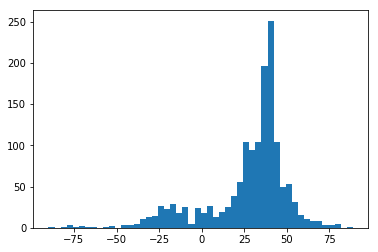

In [94]:
# Create a histogram with 50 bins
plt.hist(stationList["lat"], bins=50)
plt.show()

### Time series data

Need to tell python the date strings in the file are dates/times.

In [6]:
aeronetStaPNNL = pd.read_csv('data/20180801_20180831_PNNL_lev15.csv')
aeronetStaPNNL

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:08:2018,13:38:54,213,213.568681,0.021377,0.045989,0.059832,-999.0,-999.0,0.091885,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:08:2018,13:43:01,213,213.571539,0.019886,0.041031,0.053130,-999.0,-999.0,0.080608,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:08:2018,13:44:54,213,213.572847,0.019690,0.041370,0.053595,-999.0,-999.0,0.081946,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:08:2018,13:48:22,213,213.575255,0.017494,0.035636,0.045685,-999.0,-999.0,0.068354,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:08:2018,13:52:01,213,213.577789,0.015753,0.030823,0.039178,-999.0,-999.0,0.057334,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,01:08:2018,13:54:43,213,213.579664,0.015452,0.029810,0.037515,-999.0,-999.0,0.054358,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
6,01:08:2018,13:58:01,213,213.581956,0.015075,0.028612,0.035908,-999.0,-999.0,0.051521,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7,01:08:2018,14:01:01,213,213.584039,0.014628,0.027180,0.034184,-999.0,-999.0,0.048527,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8,01:08:2018,14:02:54,213,213.585347,0.015034,0.027499,0.034068,-999.0,-999.0,0.047927,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
9,01:08:2018,14:07:00,213,213.588194,0.014380,0.026070,0.032423,-999.0,-999.0,0.045592,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [27]:
# Convert the string dates and times to date format
aeronetStaPNNL['datetime'] = aeronetStaPNNL['Date(dd:mm:yyyy)'] + ' ' + aeronetStaPNNL['Time(hh:mm:ss)']

# Explicitly declare the format (for the full list, see http://strftime.org)
fmt = '%d:%m:%Y %H:%M:%S'
aeronetStaPNNL['datetime'] = pd.to_datetime(aeronetStaPNNL['datetime'], format=fmt)

### To plot a single variable
* Add the data using plt.plot(x='X Column Name', y='Y Column Name')

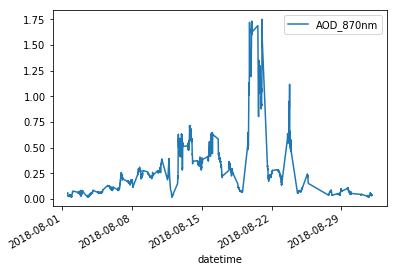

In [104]:
aeronetStaPNNL.plot(x='datetime', y='AOD_870nm')

### Main steps to combining the plots:
* Initiate a figure using plt.figure()
* Get the "current axes" using plt.gca()
* Add the data using plt.plot

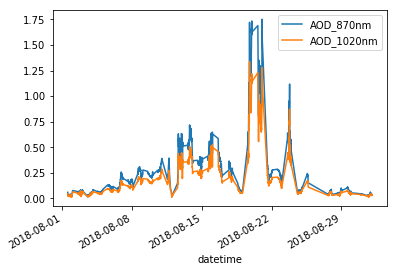

In [106]:
fig = plt.figure()
ax = plt.gca()

aeronetStaPNNL.plot(kind='line', x='datetime', y='AOD_870nm', ax=ax)
aeronetStaPNNL.plot(kind='line', x='datetime', y='AOD_1020nm', ax=ax)

### Filtering Data

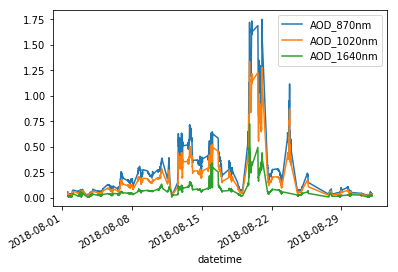

In [107]:
fig = plt.figure()
ax = plt.gca()
aeronetStaPNNL.plot(x='datetime', y='AOD_870nm', ax=ax)
aeronetStaPNNL.plot(x='datetime', y='AOD_1020nm', ax=ax)
#aeronetStaPNNL.plot(kind='line', x='datetime', y='AOD_1640nm', ax=ax)

# Filter out missing values by only using aeronetStaPNNL['AOD_1640nm'] > 0
aeronetStaPNNL[aeronetStaPNNL['AOD_1640nm'] > 0].plot(x='datetime', y='AOD_1640nm', ax=ax)

## netCDF4
netCDF files organize data into groups, which are organized like directories in a filesystem. The groups are containers for variables, dimensions and attributes. 

The netCDF4 package is included in Anaconda Python. The main function is Dataset, which reads from an existing file:
```
file_id = Dataset("test.nc", "r", format="NETCDF4")
```
You can choose to 'w' (write), 'r' (read), or 'a'

The foramts can be: NETCDF3_CLASSIC, NETCDF3_64BIT_OFFSET, NETCDF3_64BIT_DATA, NETCDF4_CLASSIC, and NETCDF4 (default)

In [52]:
from netCDF4 import Dataset

In [53]:
# To open the files, call the Dataset constructor
file_id = Dataset('data/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc')

In [54]:
# Quickly inspect the contents
file_id

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    Metadata_Conventions: CF-1.5, Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (version 17, 24 March 2011)
    project: S-NPP Data Exploitation
    institution: DOC/NOAA/NESDIS/NDE->S-NPP Data Exploitation, NESDIS, NOAA, U.S. Department of Commerce
    naming_authority: gov.noaa.nesdis.nde
    satellite_name: NPP
    instrument_name: VIIRS
    title: JPSS Risk Reduction Unique Aerosol Optical Depth
    summary: Aerosol Optical Depth
    history: VIIRS AOD Version 1.0
    processing_level: NOAA Level 2
    references: 
    id: 7e854908-1172-4d11-ae90-fb768144e6b2
    Metadata_Link: JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc
    start_orbit_number: 35149
    end_orbit_number: 35149
    day_night_data_flag: day
    ascend_descend_data_flag: 0
    time_coverage_start: 2018-08-09T19:55:53Z
    time_coverage_end: 2018

In [55]:
# Copy the AOD variable and the latitude and longitude coordinates into arrays object using .variables
AOD550 = file_id.variables['AOD550'][:]
lat = file_id.variables['Latitude'][:]
lon = file_id.variables['Longitude'][:]

In [84]:
# Get some very simple statistics by converting into a NumPy array
AOD550 = np.array(AOD550)

# Remove missing values
missing = file_id.variables['AOD550']._FillValue
AOD550 = AOD550[AOD550 != missing]

avgAOD = AOD550.mean()
stdDev = AOD550.std()
nAOD = AOD550.size

print(avgAOD, stdDev, nAOD)

0.42988843 0.3794705 1706597


# Exercise: Import netCDF file and perform basic analsys
From the data folder, import "JRR-AOD_v1r1_npp_s201808091958446_e201808092000088_c201808092051450.nc"

## Closing up
I am available by email: rebekah.esmaili@gmail.com

* Some (free!) ways to learn: 
    * [Automate boring stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    * Start your own NOAA Python Club!

Did you find this workshop helpful? Please fill out survey!

Next session: Friday, Nov 9th 9:30-11:30am

## Thank you!
I hope you enjoyed this crash course in python in remote sensing applications! Please fill out feedback, write as much as you can!